# Predicting Future Sales

The goal of the "Future Sales Prediction" project is to develop a machine learning model that can forecast future sales for a given set of products or items. The project aims to assist businesses in making informed decisions related to inventory management, production planning, and sales forecasting.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

The project utilizes historical sales data, which includes information such as sale, product/item ID,  and corresponding sales quantity.

In [3]:
dataframe = pd.read_csv('sales.csv')

# Exploratory Data Analysis


Exploratory Data Analysis (EDA) is a crucial step in the "Future Sales Prediction" project as it helps to understand the dataset, identify patterns, and gain insights that can guide the modeling process

In [4]:
dataframe.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
dataframe.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
dataframe.shape

(200, 4)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
dataframe.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

# Data Visualization

Data visualization plays a crucial role in exploratory data analysis and provides meaningful insights into the "Future Sales Prediction" project. Visualizations help to understand patterns, relationships, and distributions within the dataset

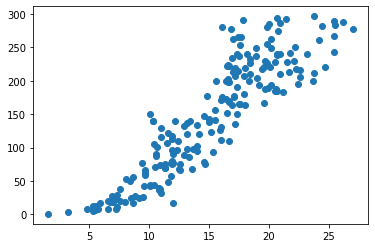

In [13]:
figure = plt.scatter(data = dataframe , x="Sales",
                    y="TV")

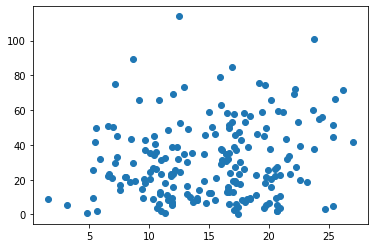

In [14]:
figure = plt.scatter(data = dataframe , x="Sales",
                    y="Newspaper")

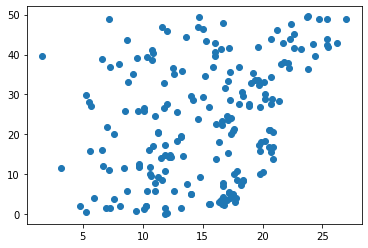

In [16]:
figure = plt.scatter(data = dataframe , x="Sales",
                    y="Radio")

In [17]:
dataframe.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [18]:
dataframe.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [19]:
corr_matrix = dataframe.corr()

In [20]:
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

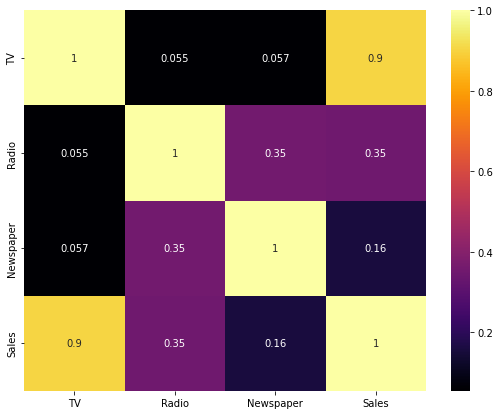

In [21]:
plt.figure(figsize = (9, 7))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

In [22]:
dataframe.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
dataset = dataframe.drop('Sales', axis = 1)

In [24]:
dataset.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


<AxesSubplot:title={'center':'Correlation with TV, Radio and Newspaper'}>

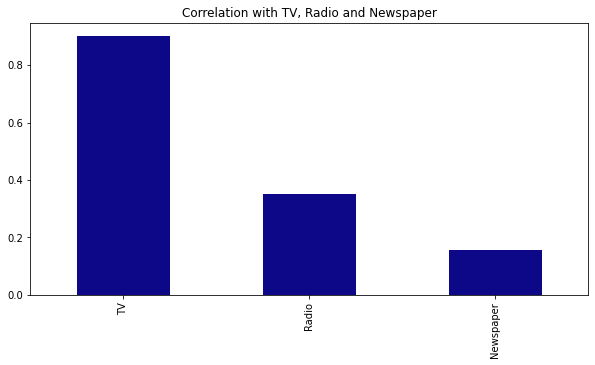

In [25]:
dataset.corrwith(dataframe['Sales']).plot.bar(
    figsize = (10, 5), 
    cmap = 'plasma', 
    title = 'Correlation with TV, Radio and Newspaper'
)

In [26]:
dataframe.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [27]:
x = np.array(dataframe.drop(["Sales"], 1))
y = np.array(dataframe["Sales"])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

# Model Training


Model training is a crucial step in the "Future Sales Prediction" project, where you develop a machine learning model using historical sales data. The trained model will then be used to make predictions on future sales.

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
print(model.score(x_test, y_test))

0.9059011844150826


In [35]:
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]


# Predicting on x-Test

In [36]:
y_pred = model.predict(x_test)

In [37]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [38]:
print(y_test[20]), print(y_pred[20])

19.7
20.806318458843467


(None, None)

# Thanks !